In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
df = pd.read_csv('../data/kc_house_data.csv')

# kc_house_data에서 price를 종속 변수로 설정하고, date와 id를 제거한 15개의 컬럼을 독립변수로 설정하여 다중 선형회귀분석을 실시한 후, 추정된 회귀모형에 대해 해석하라

In [2]:
# 데이터를 살펴보면 date와 waterfront를 제외한 나머지 변수들은 수치형 변수임을 알 수 있다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [3]:
#id와 date변수는 분석 상 별 의미가 없기에 삭제한다.
df = df.drop(['id', 'date'], axis = 1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,standard,0,3,8,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,standard,0,3,8,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,standard,0,3,7,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,standard,0,3,8,1600,0,2004,0,1410,1287


In [4]:
# 다중회귀분석을 할 때 독립변수가 범주형이면 안되므로 범주형 변수는 수치형으로 변환해준다.
#data._get_numeric_data().columns.tolist()
numeric = df._get_numeric_data().columns.tolist()
cate = list(set(df.columns) - set(numeric))

df = pd.get_dummies(df,columns = cate)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,waterfront_river_view,waterfront_standard
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,1340,5650,0,1
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,1690,7639,0,1
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,2720,8062,0,1
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,1360,5000,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,1800,7503,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,0,1530,1509,0,1
21609,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,0,1830,7200,0,1
21610,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,0,1020,2007,0,1
21611,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,0,1410,1287,0,1


## 다중선형회귀를 위한 회귀분석 가정 만족하는지 검증 및 결과 설명

C:\Users\235ju\AppData\Local\Temp\ipykernel_14912\2003133498.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(col)])


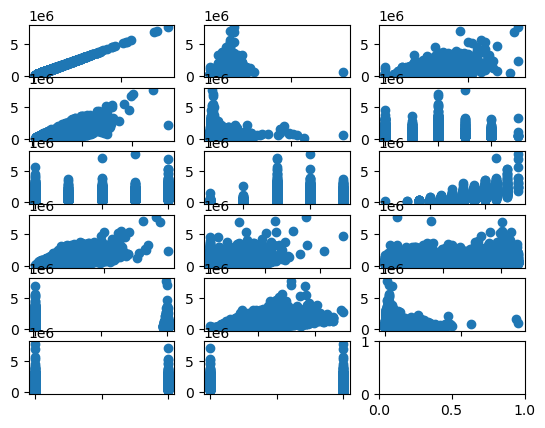

In [33]:
fig, axes = plt.subplots(6,3)
# 수치형 변수만 sorting한다
feats = [col for col in df.columns if df[col].dtypes != object]
for ax, col in zip(axes.ravel(), feats):
    ax.scatter(df[col], df['price'])
    ax.set_xticklabels([str(col)])

plt.show()

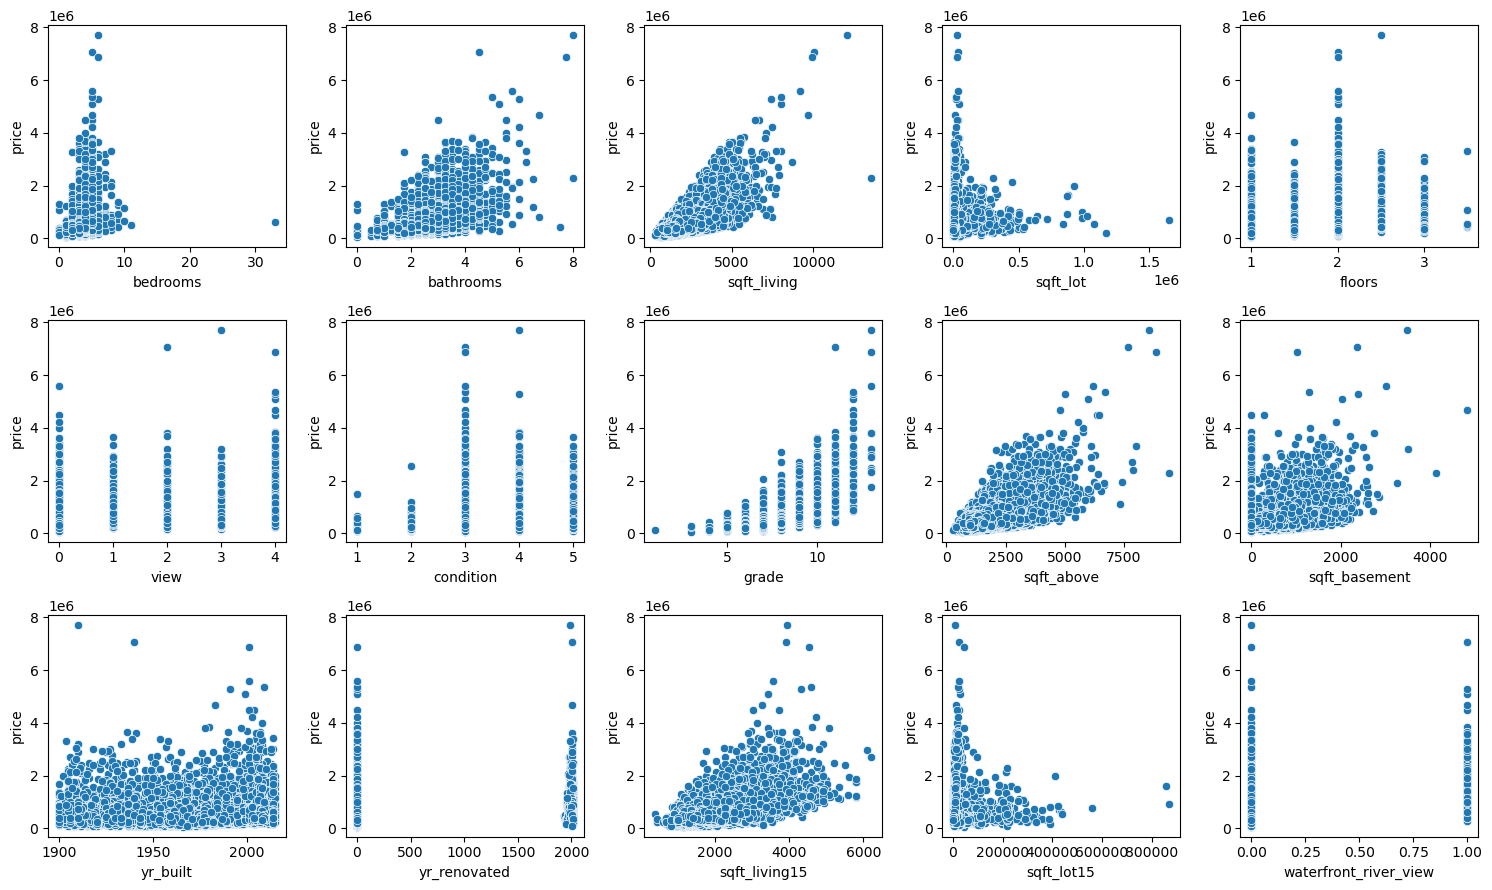

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 독립 변수 리스트와 종속 변수명 설정 (예시)
# independent_vars = ['X1', 'X2', 'X3', 'X4', 'X5']
# dependent_var = 'Y'

# subplot 사이즈 설정
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
#feats = [col for col in df.columns if df[col].dtypes != object]
# 독립 변수와 종속 변수 간의 scatter plot 그리기
for i, var in enumerate(X):
    row, col = divmod(i, 5)  # subplot 위치 계산
    ax = axes[row, col]
    sns.scatterplot(data=df, x=var, y='price', ax=ax)
    ax.set_xlabel(var)  # x축에 독립 변수명 표시
    ax.set_ylabel('price')  # y축에 종속 변수명 표시

# 빈 subplot 제거
# for i in range(len(feat), 15):
#     row, col = divmod(i, 5)
#     fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


In [8]:
# 리버뷰가 아니면 스탠다드 뷰이므로 스탠다드 뷰도 삭제
ols_str = 'price ~ '
for i in df.columns.drop(['price','waterfront_standard']):
    ols_str = ols_str + i + " + "
print(ols_str)

price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + sqft_living15 + sqft_lot15 + waterfront_river_view + 


In [9]:
ols_str[:-3]

'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + sqft_living15 + sqft_lot15 + waterfront_river_view'

In [10]:
ols_str = ols_str[:-3]

In [11]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

Y,X = dmatrices(ols_str, data =df, return_type = "dataframe")

In [12]:
X

,Intercept,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,waterfront_river_view
0,1.0,3.0,1.00,1180.0,5650.0,1.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,1340.0,5650.0,0.0
1,1.0,3.0,2.25,2570.0,7242.0,2.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,1690.0,7639.0,0.0
2,1.0,2.0,1.00,770.0,10000.0,1.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,2720.0,8062.0,0.0
3,1.0,4.0,3.00,1960.0,5000.0,1.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,1360.0,5000.0,0.0
4,1.0,3.0,2.00,1680.0,8080.0,1.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,1800.0,7503.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1.0,3.0,2.50,1530.0,1131.0,3.0,0.0,3.0,8.0,1530.0,0.0,2009.0,0.0,1530.0,1509.0,0.0
21609,1.0,4.0,2.50,2310.0,5813.0,2.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,1830.0,7200.0,0.0
21610,1.0,2.0,0.75,1020.0,1350.0,2.0,0.0,3.0,7.0,1020.0,0.0,2009.0,0.0,1020.0,2007.0,0.0
21611,1.0,3.0,2.50,1600.0,2388.0,2.0,0.0,3.0,8.0,1600.0,0.0,2004.0,0.0,1410.0,1287.0,0.0


In [13]:
# 다중공선성은 가정 검증 이후에 작성해자!!
vif_list = []
for i in range(1,len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values,i), X.columns[i]])

print(pd.DataFrame(vif_list,columns = ['vif','variable']))


C:\Users\235ju\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif,variable
0,1.644100,bedrooms
1,3.347865,bathrooms
2,inf,sqft_living
3,2.088121,sqft_lot
4,1.931951,floors
5,1.404261,view
6,1.221646,condition
7,3.234590,grade
8,inf,sqft_above
9,inf,sqft_basement


In [14]:
# 다중공선성 검정 결과 
# sqft_above, sqft_living, sqft_basement이 inf 로 심각한 다중 공선성이 존재함을 알 수 있다. 
# 1) 문제되는 변수를 제거 
method1 = df.drop(['sqft_above', 'sqft_living', 'sqft_basement'], axis = 1)
method1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21613 non-null  float64
 1   bedrooms               21613 non-null  int64  
 2   bathrooms              21613 non-null  float64
 3   sqft_lot               21613 non-null  int64  
 4   floors                 21613 non-null  float64
 5   view                   21613 non-null  int64  
 6   condition              21613 non-null  int64  
 7   grade                  21613 non-null  int64  
 8   yr_built               21613 non-null  int64  
 9   yr_renovated           21613 non-null  int64  
 10  sqft_living15          21613 non-null  int64  
 11  sqft_lot15             21613 non-null  int64  
 12  waterfront_river_view  21613 non-null  uint8  
 13  waterfront_standard    21613 non-null  uint8  
dtypes: float64(3), int64(9), uint8(2)
memory usage: 2.0 MB

In [16]:
X = df.drop(['price','waterfront_standard'],axis = 1)
y = df['price'].values

In [17]:
# 아무것도 건들이지 않았을 때 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 2023)
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [18]:
#기울기와 절편은 따로 호출해서 확인
print('기울기 : ', lr.coef_)
print('절편 : ', lr.intercept_)

기울기 :  [-4.24129667e+04  4.41880915e+04  1.13031248e+02  2.89593075e-02
  2.74970423e+04  4.30844998e+04  1.84734556e+04  1.21338275e+05
  5.19822821e+01  6.10489662e+01 -3.59561149e+03  1.36364840e+01
  2.33566951e+01 -5.73816856e-01  6.26806441e+05]
절편 :  6243487.088301302


In [30]:
y_pred = lr.predict(X_test)
y_pred

# 잔차를 확인하는 방법 : y값과 추정값의 차를 계산
resid = y_test - y_pred
resid.values
'''
resid.values :
array([-177541.66589106, -415559.0688713 , -238977.95504792, ...,
         39805.85901832,   90467.32318695,  -31852.48098161])
이런 결과를 만들어줌

'''



AttributeError: 'numpy.ndarray' object has no attribute 'values'

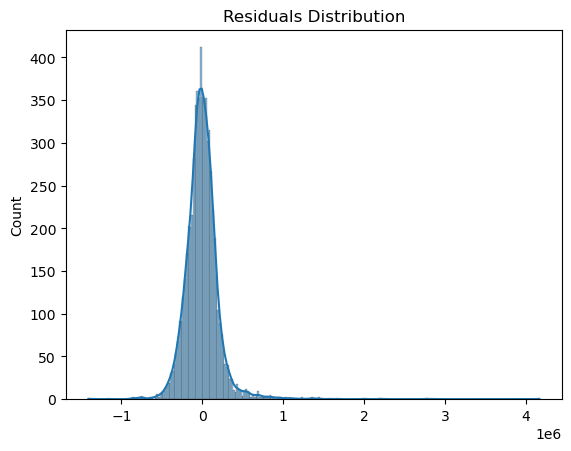

In [20]:
import matplotlib.pyplot as plt
sns.histplot(resid, kde=True)
plt.title('Residuals Distribution')
plt.show()

In [21]:
# H0: 잔차는 정규분포를 따른다
# H1: 잔차는 정규분포를 따르지 않는다.

import scipy.stats as stats
stats.shapiro(resid)
#pvalue가 유의수준인 0.05보다 작으므로 잔차는 정규성을 만족한다.

C:\Users\235ju\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8519784212112427, pvalue=0.0)

In [22]:
# 잔차의 등분산성
# H0 : 잔차가 등분산성을 만족한다
# H1 : 잔차가 등분산성을 만족하지 않는다

from scipy.stats import bartlett
bartlett_test = bartlett(y, resid)
print("Bartlett's Test (p-value):", bartlett_test.pvalue)


Bartlett's Test (p-value): 0.0


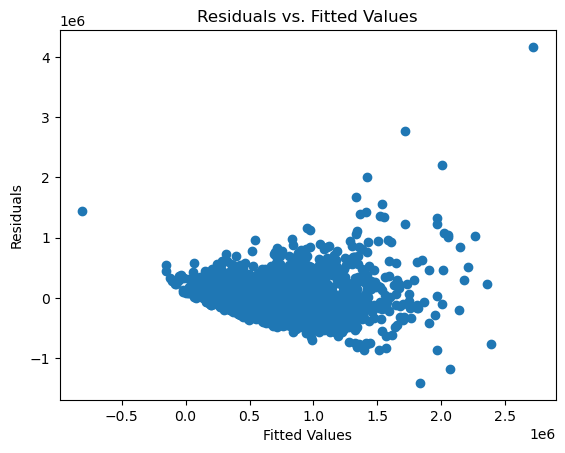

In [23]:
# 등분산성 확인
plt.scatter(y_pred, resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# 점점 퍼지는 모양으로 이분산임을 알 수 있다. 

In [27]:
#잔차의 독립성 검정
'''
Durbin-Watson 통계량이 2에 가까우므로 잔차가 독립성을 만족함.
(Durbin-Watson 통계량이 0에 가까우면 잔차 간의 양의 상관관계, Durbin-Watson 통계량이 4에 가까우면 잔차 간의 음의 상관관계)
'''
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(resid)
print(dw_statistic)


1.9883374461745278
